In [15]:
import numpy as np
import matplotlib.pyplot as plt
from poles_roots.aaa import AAA
from poles_roots.plotting import phase_plot
import time
from tqdm import tqdm
plt.style.use(['science','ieee'])
plt.rcParams['font.size'] = 13

In [16]:
M = 8

def f(z):
    shift = np.linspace(-1, 1, num=M)*1j
    return np.sum(1/np.sin(M*np.add.outer(z, shift)), axis=-1)

100%|██████████| 4/4 [13:40<00:00, 205.16s/it]


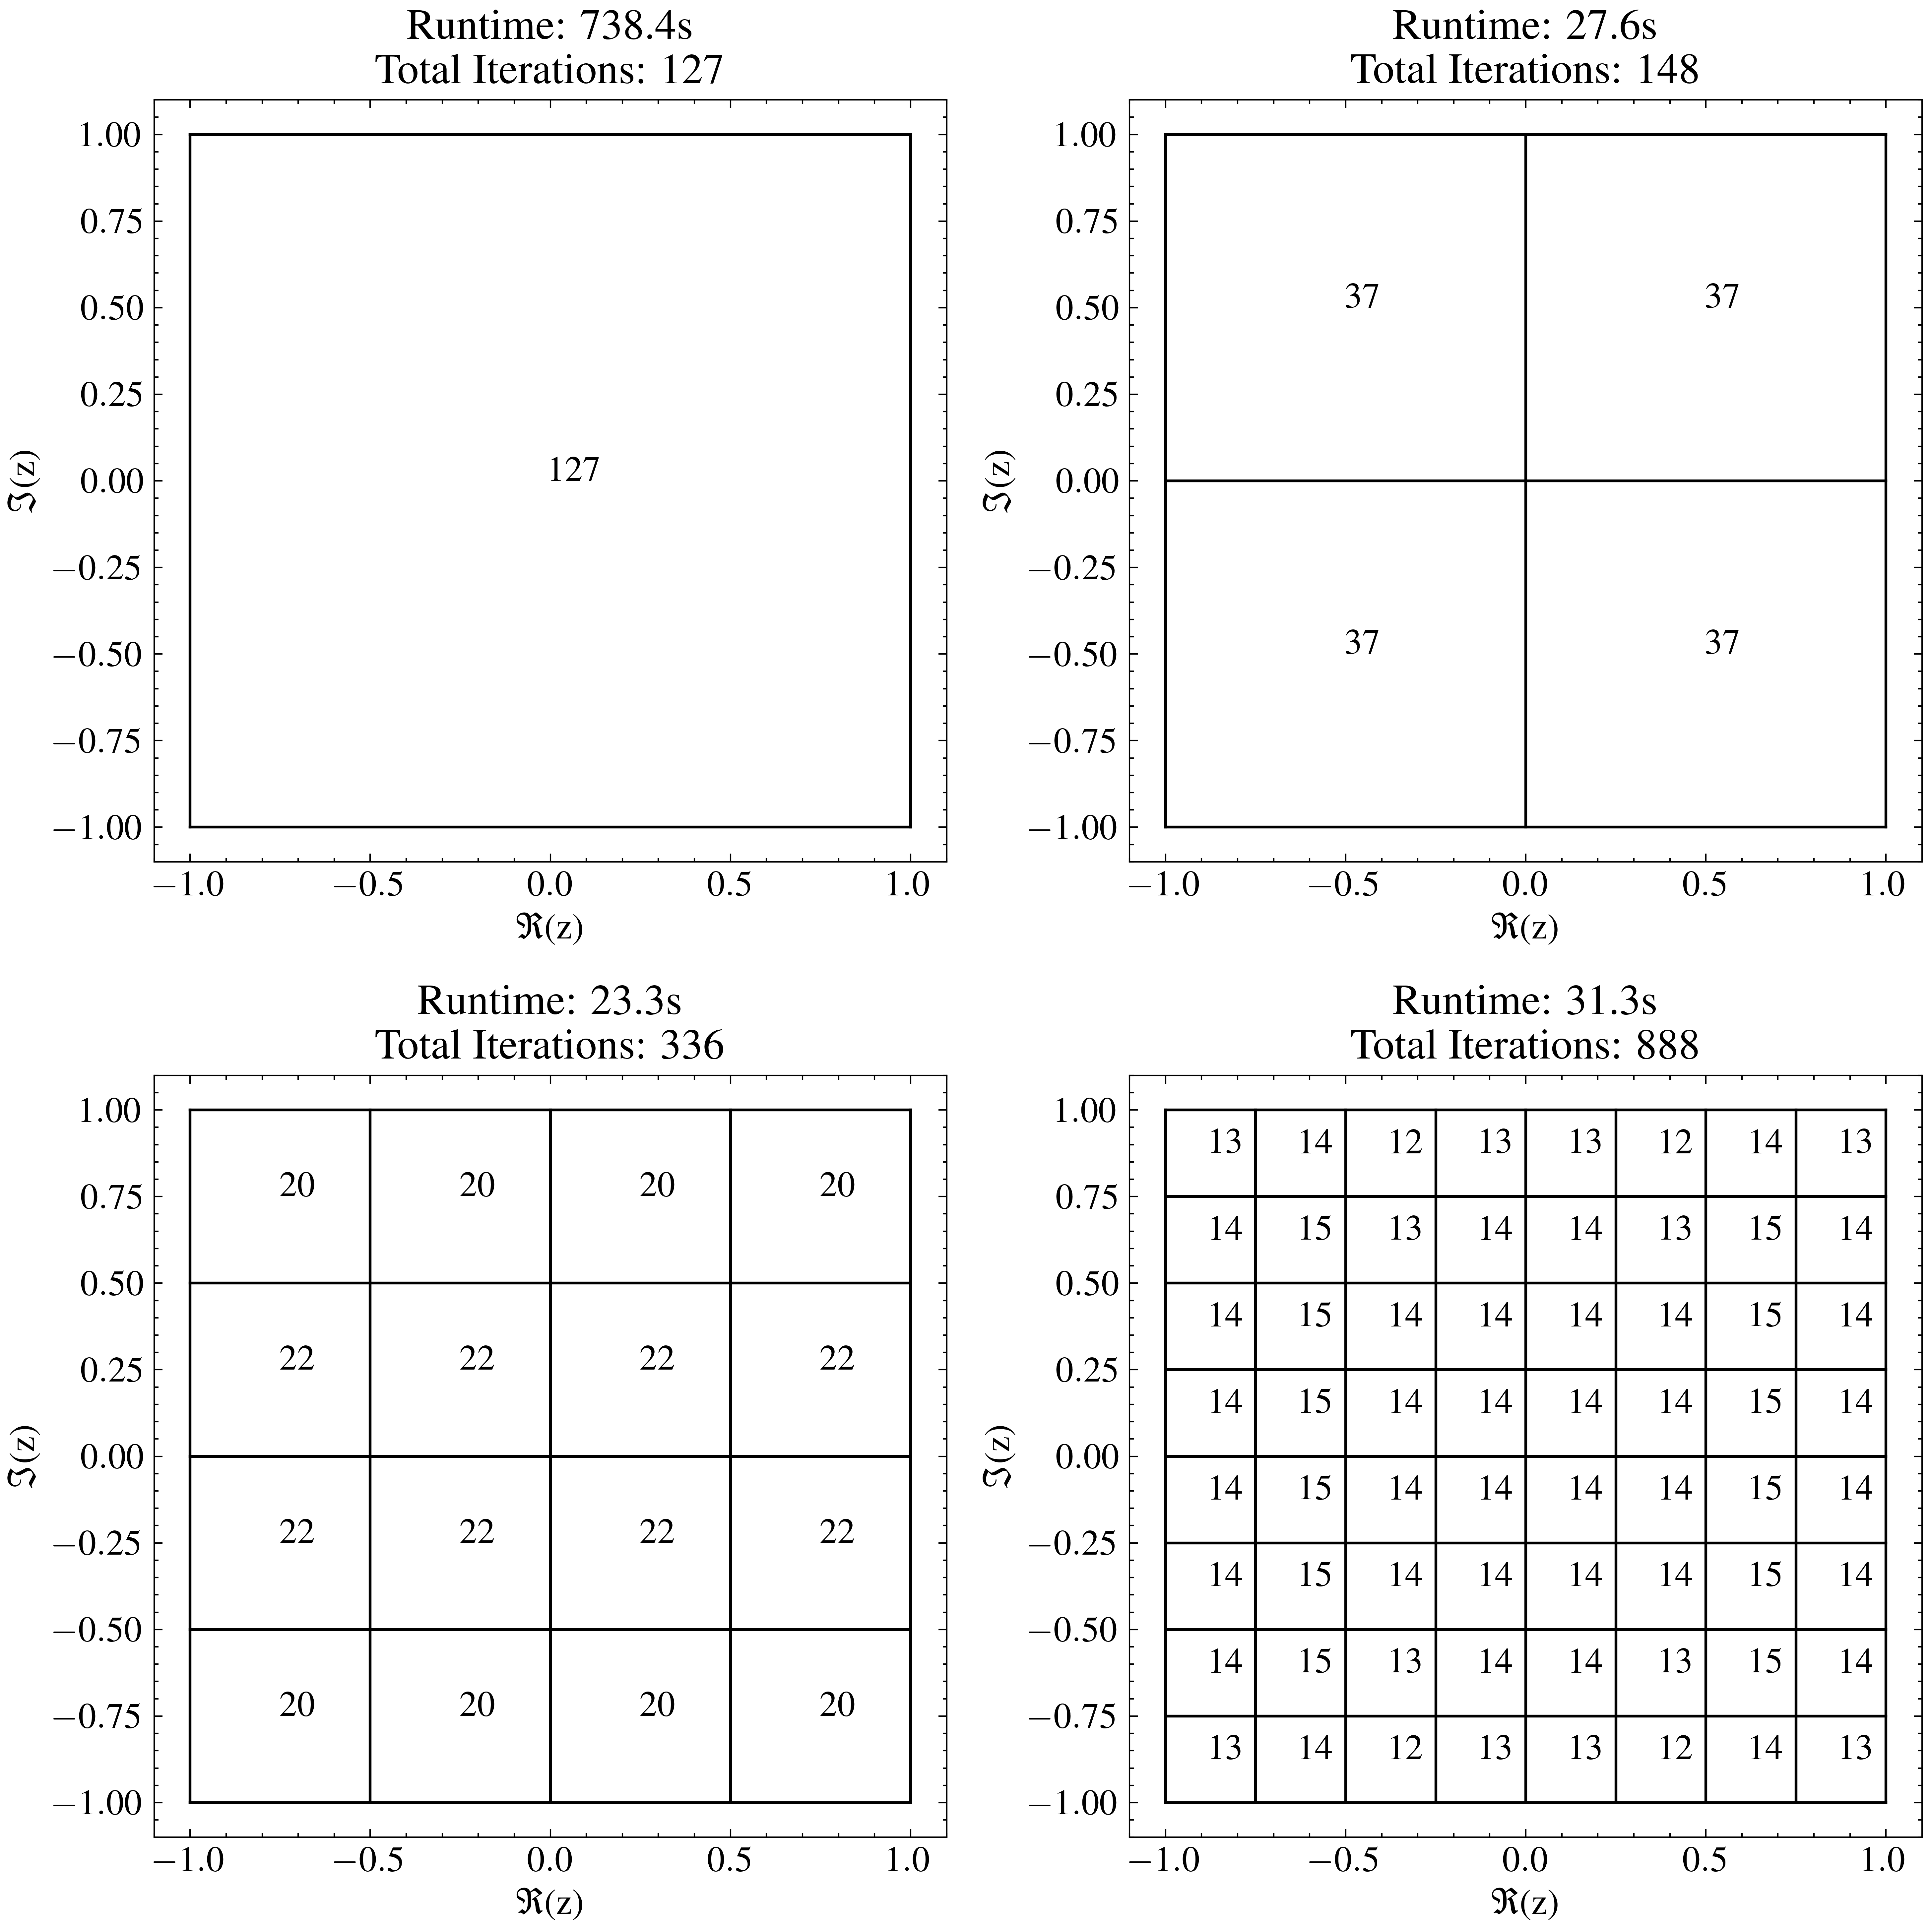

In [17]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(10, 10))

for level in tqdm(range(4)):
    ax = axs.ravel()[level]
    corners = np.linspace(-1, 1 , 2**level +1)
    
    ax.plot([-1, 1], np.stack([corners, corners]), 'k-')
    ax.plot(np.stack([corners, corners]),[-1, 1] , 'k-')
    x = np.linspace(-1, 1, num=500)
    y = np.linspace(-1, 1, num=500)
    
    total_time = 0
    total_iterations = 0
    for i in range(corners.size - 1):
        for j in range(corners.size -1):
            xx ,yy = np.meshgrid(x[(x >= corners[i]) & (x <= corners[i+1])], y[(y >= corners[j]) & (y <= corners[j+1])])
            z = (xx + yy*1j).ravel()
            tic = time.perf_counter()
            res = AAA(f(z), z, max_terms=150)
            toc = time.perf_counter()
            total_time += toc - tic
            total_iterations += res.weights.size
            ax.text(np.mean([corners[i], corners[i + 1]]), np.mean([corners[j], corners[j + 1]]), res.weights.size)
    ax.set_title(f"Runtime: {total_time:.1f}s\n Total Iterations: {total_iterations}")
    ax.set_xlabel(r"$\Re$(z)")
    ax.set_ylabel(r"$\Im$(z)")
plt.tight_layout()
plt.savefig("figures/AAA_subdivision.pdf")
            

/tmp/ipykernel_446677/492037688.py:5: RuntimeWarning: divide by zero encountered in divide
  return np.sum(1/np.sin(M*np.add.outer(z, shift)), axis=-1)
/tmp/ipykernel_446677/492037688.py:5: RuntimeWarning: invalid value encountered in divide
  return np.sum(1/np.sin(M*np.add.outer(z, shift)), axis=-1)


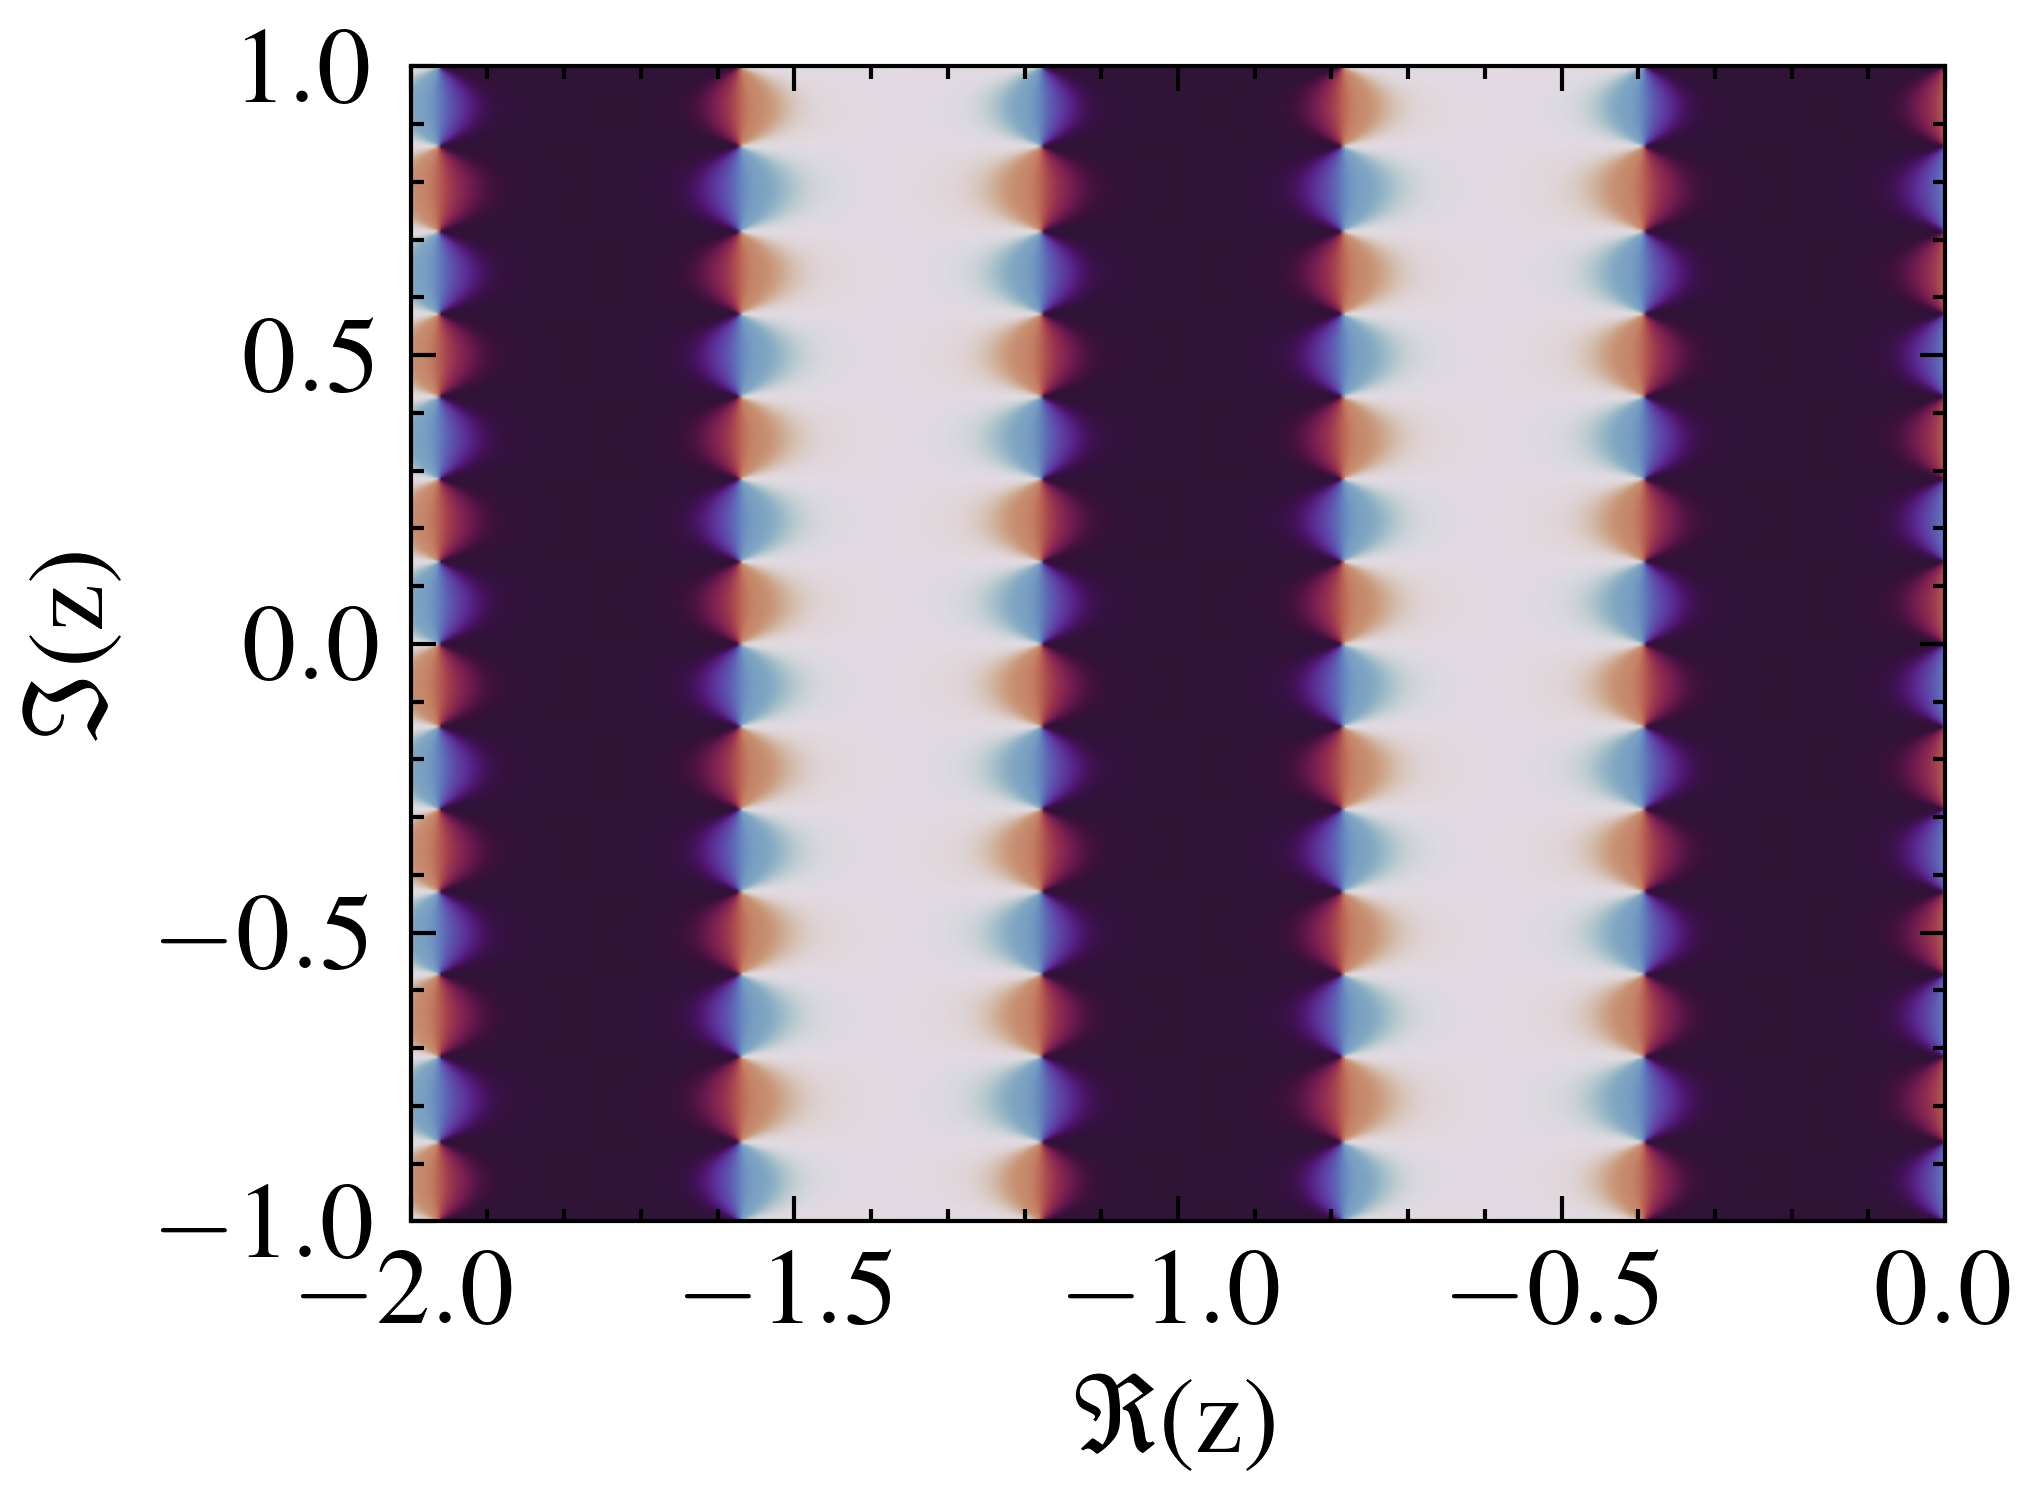

In [18]:
fig, ax = plt.subplots()
phase_plot(f, ax, domain=[-2, 0, -1, 1])
plt.savefig("figures/AAA_subdivision_function.pdf")